In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re 
from nltk.stem.snowball import SnowballStemmer
!pip install wordcloud
!pip install nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import seaborn as sns

In [2]:
dataset = pd.read_csv("amazon_review.csv")

In [3]:
dataset.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [4]:
dataset.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [5]:
def prepro_txt(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    snow = SnowballStemmer("english")
    stemmed_tokens = [snow.stem(word) for word in tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

In [6]:
dataset['preprocessed_text'] = dataset['reviews.text'].apply(prepro_txt)
dataset['preprocessed_text'].head()

0    initi troubl decid paperwhit voyag review less...
1    allow prefac littl histori casual reader own n...
2    enjoy far great read origin fire sinc 2012 fir...
3    bought one first paperwhit pleas constant comp...
4    say upfront like coropor hermet close stuff li...
Name: preprocessed_text, dtype: object

In [7]:
sentiment = SentimentIntensityAnalyzer()

In [8]:
text_column = 'reviews.text'
dataset['Compound'] = [sentiment.polarity_scores(text)['compound'] for text in dataset[text_column]]
dataset['Negative'] = [sentiment.polarity_scores(text)['neg'] for text in dataset[text_column]]
dataset['Positive'] = [sentiment.polarity_scores(text)['pos'] for text in dataset[text_column]]
dataset['Neutral'] = [sentiment.polarity_scores(text)['neu'] for text in dataset[text_column]]

In [9]:
dataset.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.userProvince,reviews.username,sizes,upc,weight,preprocessed_text,Compound,Negative,Positive,Neutral
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Cristina M,NaN,NaN,205 grams,initi troubl decid paperwhit voyag review less...,0.9804,0.038,0.169,0.793
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Ricky,NaN,NaN,205 grams,allow prefac littl histori casual reader own n...,0.9874,0.041,0.147,0.812
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Tedd Gardiner,NaN,NaN,205 grams,enjoy far great read origin fire sinc 2012 fir...,0.4364,0.181,0.223,0.596
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Dougal,NaN,NaN,205 grams,bought one first paperwhit pleas constant comp...,0.9743,0.030,0.105,0.865
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Miljan David Tanic,NaN,NaN,205 grams,say upfront like coropor hermet close stuff li...,0.9930,0.089,0.195,0.715


In [10]:
dataset[['Compound','Negative','Positive','Neutral']].describe()

,Compound,Negative,Positive,Neutral
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,0.704238,0.042146,0.201395,0.756451
std,0.443395,0.046678,0.142262,0.133242
min,-0.965200,0.000000,0.000000,0.000000
25%,0.659700,0.000000,0.117000,0.712000
50%,0.906200,0.035000,0.168000,0.787000
75%,0.975800,0.068000,0.241000,0.835000
max,0.999900,0.462000,1.000000,1.000000


<Axes: xlabel='Compound', ylabel='Count'>

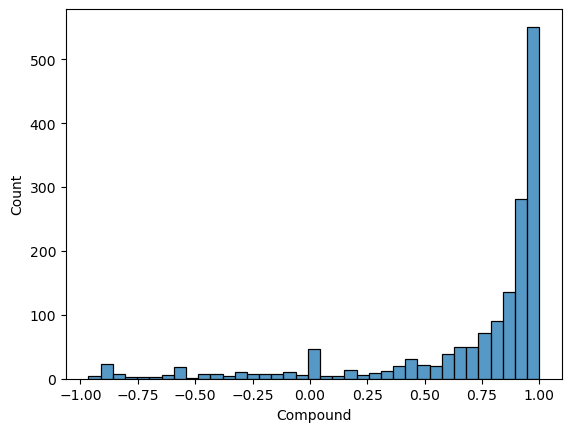

In [11]:
sns.histplot(dataset['Compound'])

<Axes: xlabel='Positive', ylabel='Count'>

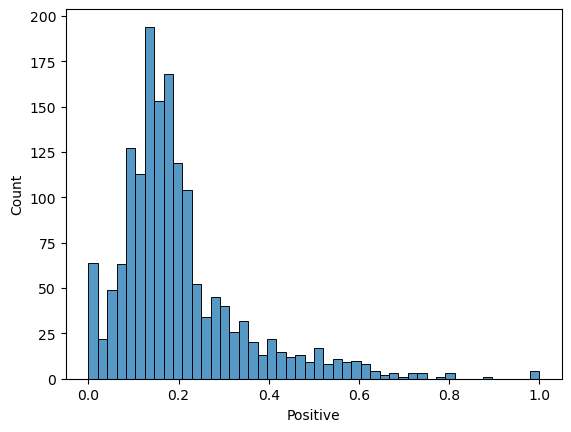

In [12]:
sns.histplot(dataset['Positive'])

<Axes: xlabel='Negative', ylabel='Count'>

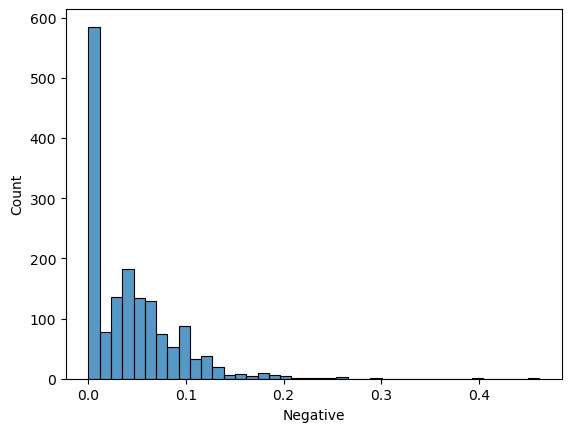

In [13]:
sns.histplot(dataset['Negative'])

<Axes: xlabel='Neutral', ylabel='Count'>

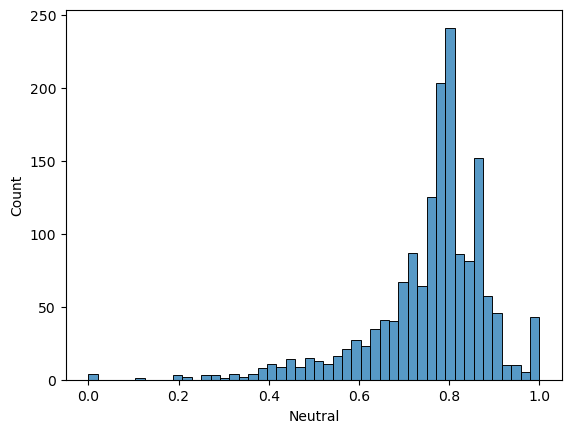

In [14]:
sns.histplot(dataset['Neutral'])

In [15]:
(dataset['Compound']<=0).groupby(dataset['name']).sum()

name
Alexa Voice Remote for Amazon Echo and Echo Dot                   2
Alexa Voice Remote for Amazon Fire TV and Fire TV Stick           6
All-New Amazon Fire 7 Tablet Case (7th Generation                 4
All-New Amazon Fire HD 8 Tablet Case (7th Generation              4
All-New Amazon Fire TV Game Controller                            3
                                                                 ..
Kindle Paperwhite E-reader - Black                                0
Kindle Voyage E-reader                                            0
Kindle for Kids Bundle with the latest Kindle E-reader            1
Moshi Anti-Glare No Bubble Screen Protector for the Fire Phone    4
Replacement Remote for Amazon Fire TV Stick                       6
Name: Compound, Length: 62, dtype: int64

In [16]:
(dataset['Positive']>=0).groupby(dataset['name']).sum()

name
Alexa Voice Remote for Amazon Echo and Echo Dot                    7
Alexa Voice Remote for Amazon Fire TV and Fire TV Stick           12
All-New Amazon Fire 7 Tablet Case (7th Generation                 27
All-New Amazon Fire HD 8 Tablet Case (7th Generation              18
All-New Amazon Fire TV Game Controller                             7
                                                                  ..
Kindle Paperwhite E-reader - Black                                 6
Kindle Voyage E-reader                                             3
Kindle for Kids Bundle with the latest Kindle E-reader             6
Moshi Anti-Glare No Bubble Screen Protector for the Fire Phone    12
Replacement Remote for Amazon Fire TV Stick                       17
Name: Positive, Length: 62, dtype: int64

In [17]:
(dataset['Negative']<=0).groupby(dataset['name']).sum()

name
Alexa Voice Remote for Amazon Echo and Echo Dot                    0
Alexa Voice Remote for Amazon Fire TV and Fire TV Stick            0
All-New Amazon Fire 7 Tablet Case (7th Generation                 11
All-New Amazon Fire HD 8 Tablet Case (7th Generation               3
All-New Amazon Fire TV Game Controller                             1
                                                                  ..
Kindle Paperwhite E-reader - Black                                 2
Kindle Voyage E-reader                                             0
Kindle for Kids Bundle with the latest Kindle E-reader             1
Moshi Anti-Glare No Bubble Screen Protector for the Fire Phone     0
Replacement Remote for Amazon Fire TV Stick                        0
Name: Negative, Length: 62, dtype: int64

Calculate the percentage of positive and negative reviews per product

In [18]:
percent_negative = pd.DataFrame(((dataset['Compound'] <= 0).groupby(dataset['name']).sum() / dataset['name'].
                                 groupby(dataset['name']).count()) * 100, 
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
name,
Certified Refurbished Amazon Fire TV (Previous Generation - 1st),0.000000
Amazon Tap Sling Cover - Blue,0.000000
Amazon Tap Sling Cover - Green,0.000000
Amazon Tap Sling Cover - Magenta,0.000000
Amazon Tap Sling Cover - Tangerine,0.000000
...,...
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,42.105263
All-New Amazon Fire TV Game Controller,42.857143
Certified Refurbished Fire HD 10 Tablet,50.000000


In [19]:
percent_positive = pd.DataFrame(((dataset['Positive']).groupby(dataset['name']).sum() / dataset['name'].
                                 groupby(dataset['name']).count()) * 100, 
                                columns=['% positive reviews']).sort_values(by='% positive reviews')

percent_positive

,% positive reviews
name,
"Kindle Fire HDX 8.9""",7.927907
Alexa Voice Remote for Amazon Fire TV and Fire TV Stick,9.608333
Certified Refurbished Kindle E-reader - Black,9.685714
Echo Show - Black,9.742857
Certified Refurbished Kindle E-reader,9.800000
...,...
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,27.668266
Amazon Kindle Oasis Premium Leather Battery Cover - Walnut,32.408333
All-New Amazon Kid-Proof Case for Amazon Fire 7 Tablet (7th Generation,33.723077


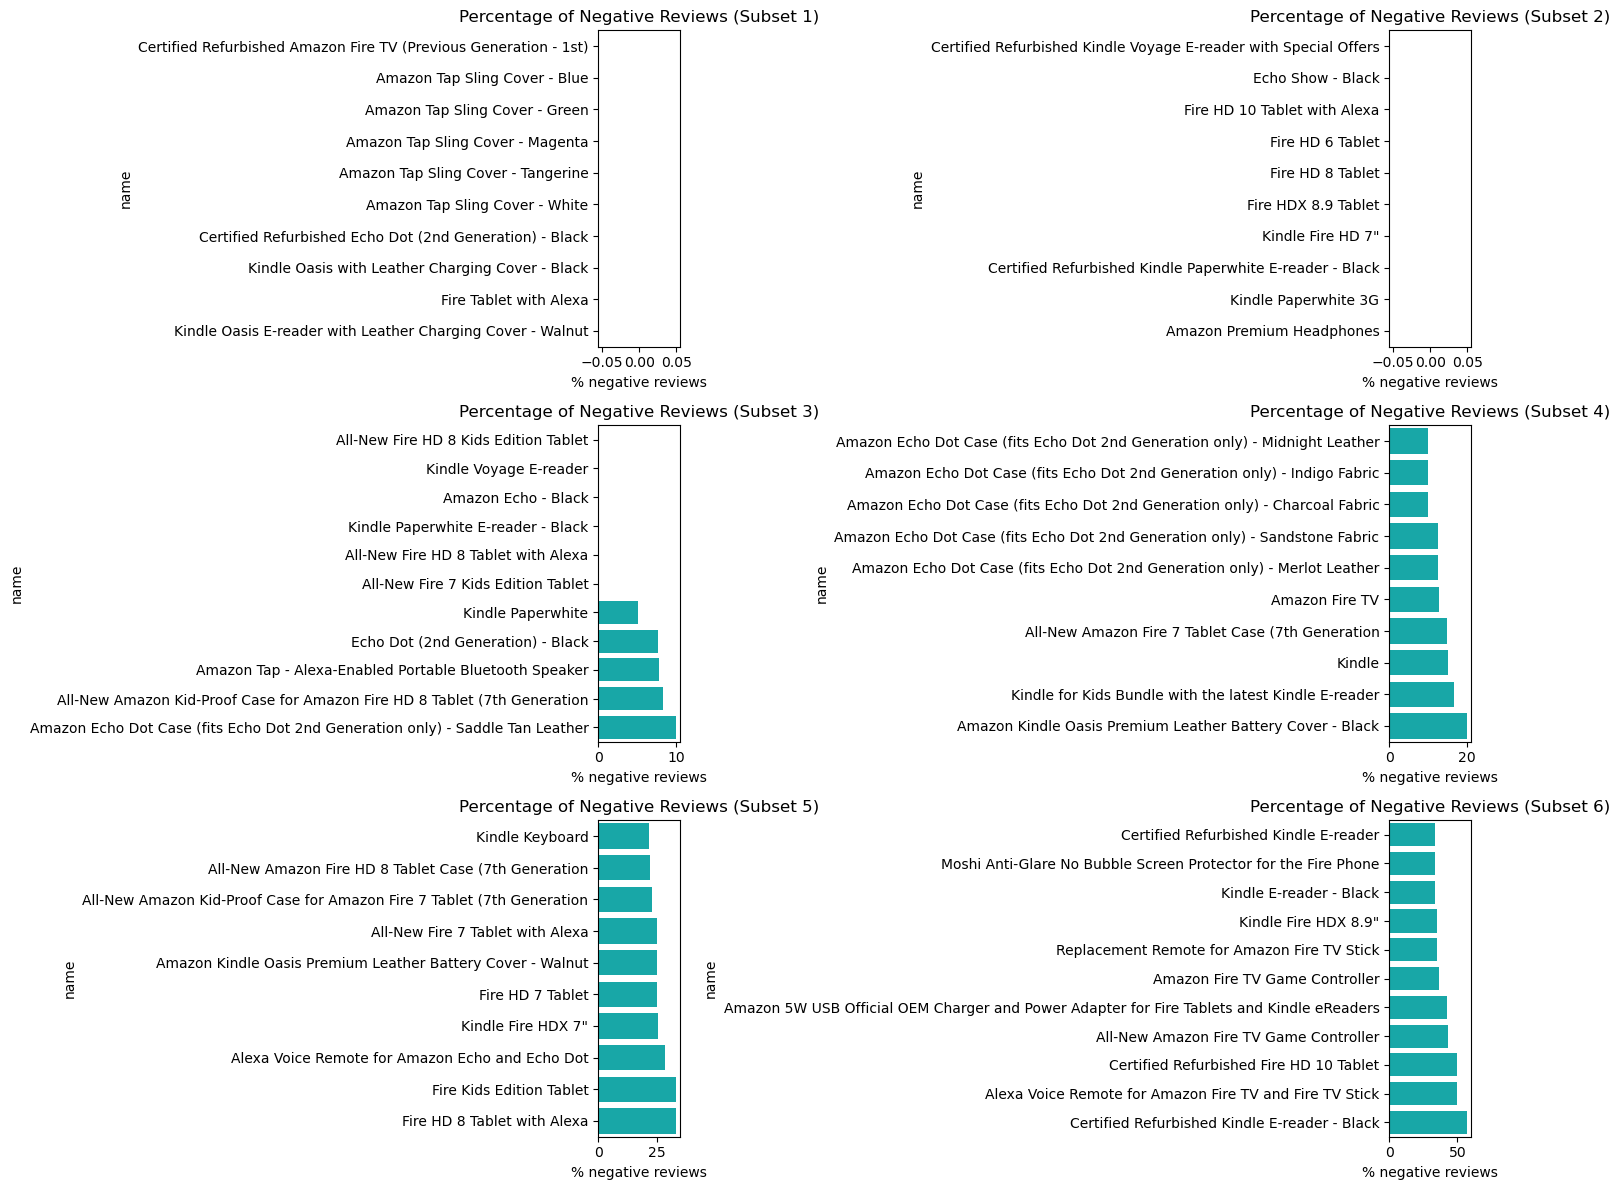

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i in range(6):
    start_idx = i * len(percent_negative) // 6
    end_idx = (i + 1) * len(percent_negative) // 6
    sns.barplot(ax=axes[i], x=percent_negative['% negative reviews'][start_idx:end_idx], y=percent_negative.index[start_idx:end_idx], color='c')
    axes[i].set_title(f'Percentage of Negative Reviews (Subset {i + 1})')

plt.tight_layout()
plt.show()

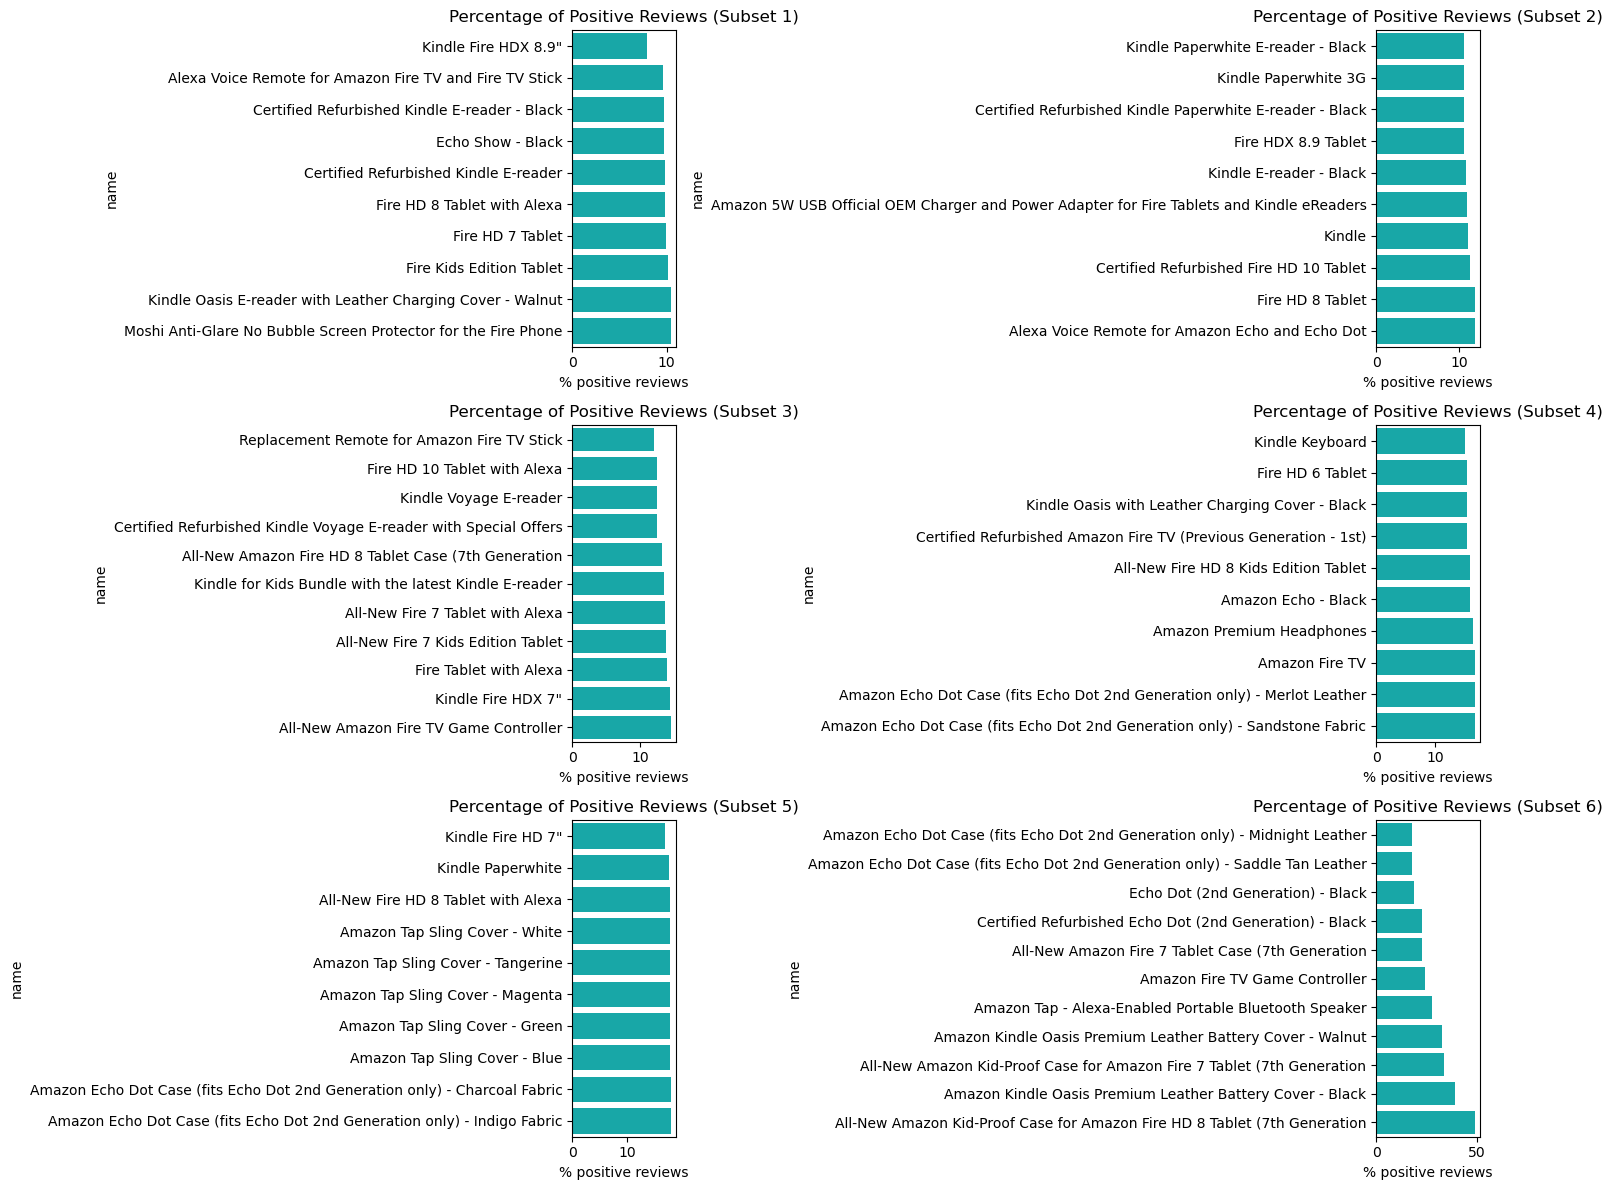

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i in range(6):
    start_idx = i * len(percent_positive) // 6
    end_idx = (i + 1) * len(percent_positive) // 6
    sns.barplot(ax=axes[i], x=percent_positive['% positive reviews'][start_idx:end_idx], y=percent_positive.index[start_idx:end_idx], color='c')
    axes[i].set_title(f'Percentage of Positive Reviews (Subset {i + 1})')

plt.tight_layout()
plt.show()

Create a wordcloud to view the most frequent words we see in the review column

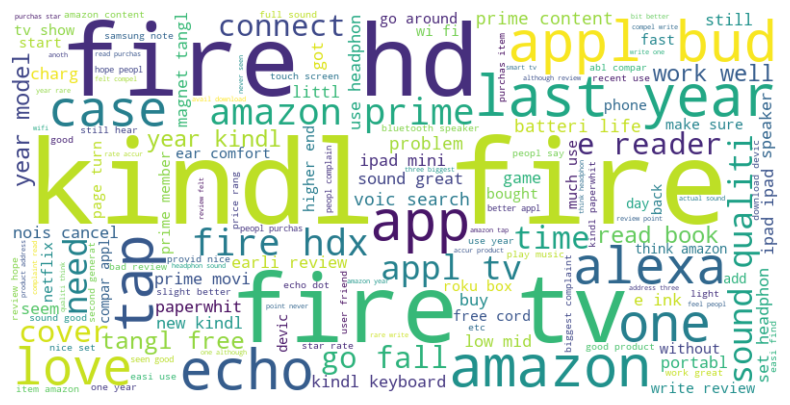

In [22]:
dataset['vader_score'] = dataset['reviews.text'].apply(lambda text: sentiment.polarity_scores(str(text))['compound'])

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(dataset['preprocessed_text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We would like to see the most used word for negative words

In [24]:
compound = (dataset['Compound']<=0).groupby(dataset['name']).sum()

In [25]:
negative = (dataset['Negative']<=0).groupby(dataset['name']).sum()

In [45]:
positive = (dataset['Positive']>=0).groupby(dataset['name']).sum()

In [47]:
positive.describe()

count     62.000000
mean      25.758065
std       72.706616
min        3.000000
25%        4.000000
50%        8.000000
75%       13.000000
max      542.000000
Name: Positive, dtype: float64